In [198]:
import numpy as np
import ninjax.pipes.pipe_utils as utils
import json
from jimgw.core.single_event.utils import C1_C2_to_f_stop, Mc_q_to_m1_m2, L1_L2_to_a1_a2
import corner as corn
import matplotlib.pyplot as plt

In [199]:
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        #color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False,
                        #truth_color="red")
)

LABELS_TRANSLATION_DICT = {"M_c": r'$M_c/M_\odot$', 
                           "q": r'$q$', 
                           "s1_z": r'$\chi_1$',
                           "s2_z": r'$\chi_2$',
                           "lambda_1": r'$\Lambda_1$',
                           "lambda_2": r'$\Lambda_2$',
                           "f_stop": r'$f_{\rm{stop}}$',
                           "a_1": r'$a_1$',
                           "a_2": r'$a_2$',
                           "d_L": r'$d_{\rm{L}}/{\rm Mpc}$',
                           "t_c": r'$t_c$', 
                           "phase_c": r'$\phi_c$', 
                           "iota": r'$\iota$', 
                           "psi": r'$\psi$',
                           "ra": r'$\alpha$',
                           "dec": r'$\delta$'}

In [200]:
def plot_corner(folder_path, keys):
    chains_path = folder_path + "chains_production.npz"
    injection_path = folder_path + "injection.json"
    
    data = np.load(chains_path)
    chains = {key: np.array(data[key]) for key in keys}
    chains = np.array([chains[key].flatten() for key in keys])

    with open(injection_path, "r") as f:
        injection = json.load(f)
    #Transfrom C1 and C2 to f_stop if needed
    if ("C_1" and "C_2" in injection) and ("f_stop" in keys):
        print("Transforming C1 and C2 to f_stop for injection values")
        m1, m2  = Mc_q_to_m1_m2(injection["M_c"], injection["q"])
        f_stop = C1_C2_to_f_stop(injection["C_1"], injection["C_2"], m1, m2)
        injection["f_stop"] = f_stop
        del injection["C_1"]
        del injection["C_2"]
    truths = np.array([injection[key] for key in keys]) 
    labels = [LABELS_TRANSLATION_DICT[key] for key in keys]

    corn.corner(chains.T, labels=labels, truths=truths, **default_corner_kwargs)

In [201]:
def plot_corner_multiple(
    folder_path,
    keys,
    fig=None,
    color="C0",
    label=None,
    show_truths=True,
):
    chains_path = folder_path + "chains_production.npz"
    injection_path = folder_path + "injection.json"
    
    data = np.load(chains_path)
    chains = {key: np.array(data[key]) for key in keys}
    chains = np.array([chains[key].flatten() for key in keys])

    with open(injection_path, "r") as f:
        injection = json.load(f)

    # Transform C1 and C2 to f_stop if needed
    if ("C_1" in injection) and ("C_2" in injection) and ("f_stop" in keys):
        print("Transforming C1 and C2 to f_stop for injection values")
        m1, m2 = Mc_q_to_m1_m2(injection["M_c"], injection["q"])
        f_stop = C1_C2_to_f_stop(injection["C_1"], injection["C_2"], m1, m2)
        injection["f_stop"] = f_stop
        del injection["C_1"]
        del injection["C_2"]

    truths = None
    if show_truths:
        truths = np.array([injection[key] for key in keys])

    labels = [LABELS_TRANSLATION_DICT[key] for key in keys]

    fig = corn.corner(
        chains.T,
        labels=labels,
        truths=truths,
        fig=fig,                     # <-- KEY for overlapping
        color=color,
        truth_color=color,
        **default_corner_kwargs
    )

    handle = None
    if label is not None:
        handle = plt.Line2D([], [], color=color, label=label)

    return fig, handle


In [202]:
all_keys = ["M_c", "q", "s1_z", "s2_z", "lambda_1", "lambda_2", "f_stop", "a_1", "a_2", "d_L", "t_c", "phase_c", "iota", "psi", "ra", "dec"]
mass_lambda_keys = ["M_c", "q", "lambda_1", "lambda_2"]
mass_lambda_spin_keys = ["M_c", "q", "s1_z", "s2_z", "lambda_1", "lambda_2"]
mass_lambda_spin_a_keys = ["M_c", "q", "s1_z", "s2_z", "lambda_1", "lambda_2", "a_1", "a_2"]
mass_spin_a_keys = ["M_c", "q", "s1_z", "s2_z", "a_1", "a_2"]

# Tidal, no spin, $m_1=m_2=0.9 M_\odot$

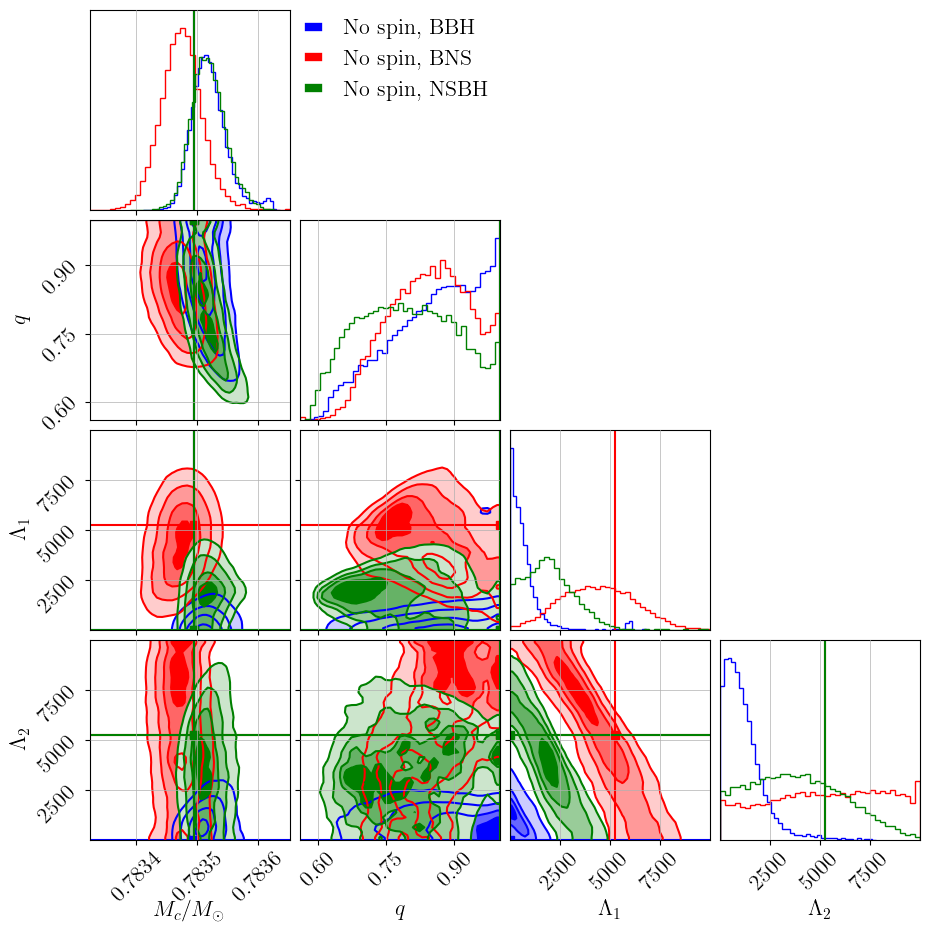

In [203]:
folder = "SSM_test-no_spin(m1=m2=0.9)/BBH/"
fig, h1 = plot_corner_multiple(folder, mass_lambda_keys, color="blue", label="No spin, BBH")

folder = "SSM_test-no_spin(m1=m2=0.9)/BNS/"
fig, h2 = plot_corner_multiple(folder, mass_lambda_keys, fig=fig, color="red", label="No spin, BNS")

folder = "SSM_test-no_spin(m1=m2=0.9)/NSBH/"
fig, h3 = plot_corner_multiple(folder, mass_lambda_keys, fig=fig, color="green", label="No spin, NSBH")

handles = [h for h in (h1, h2, h3) if h is not None]
fig.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)


# Spin, no tidal, $m_1=m_2=0.9 M_\odot$

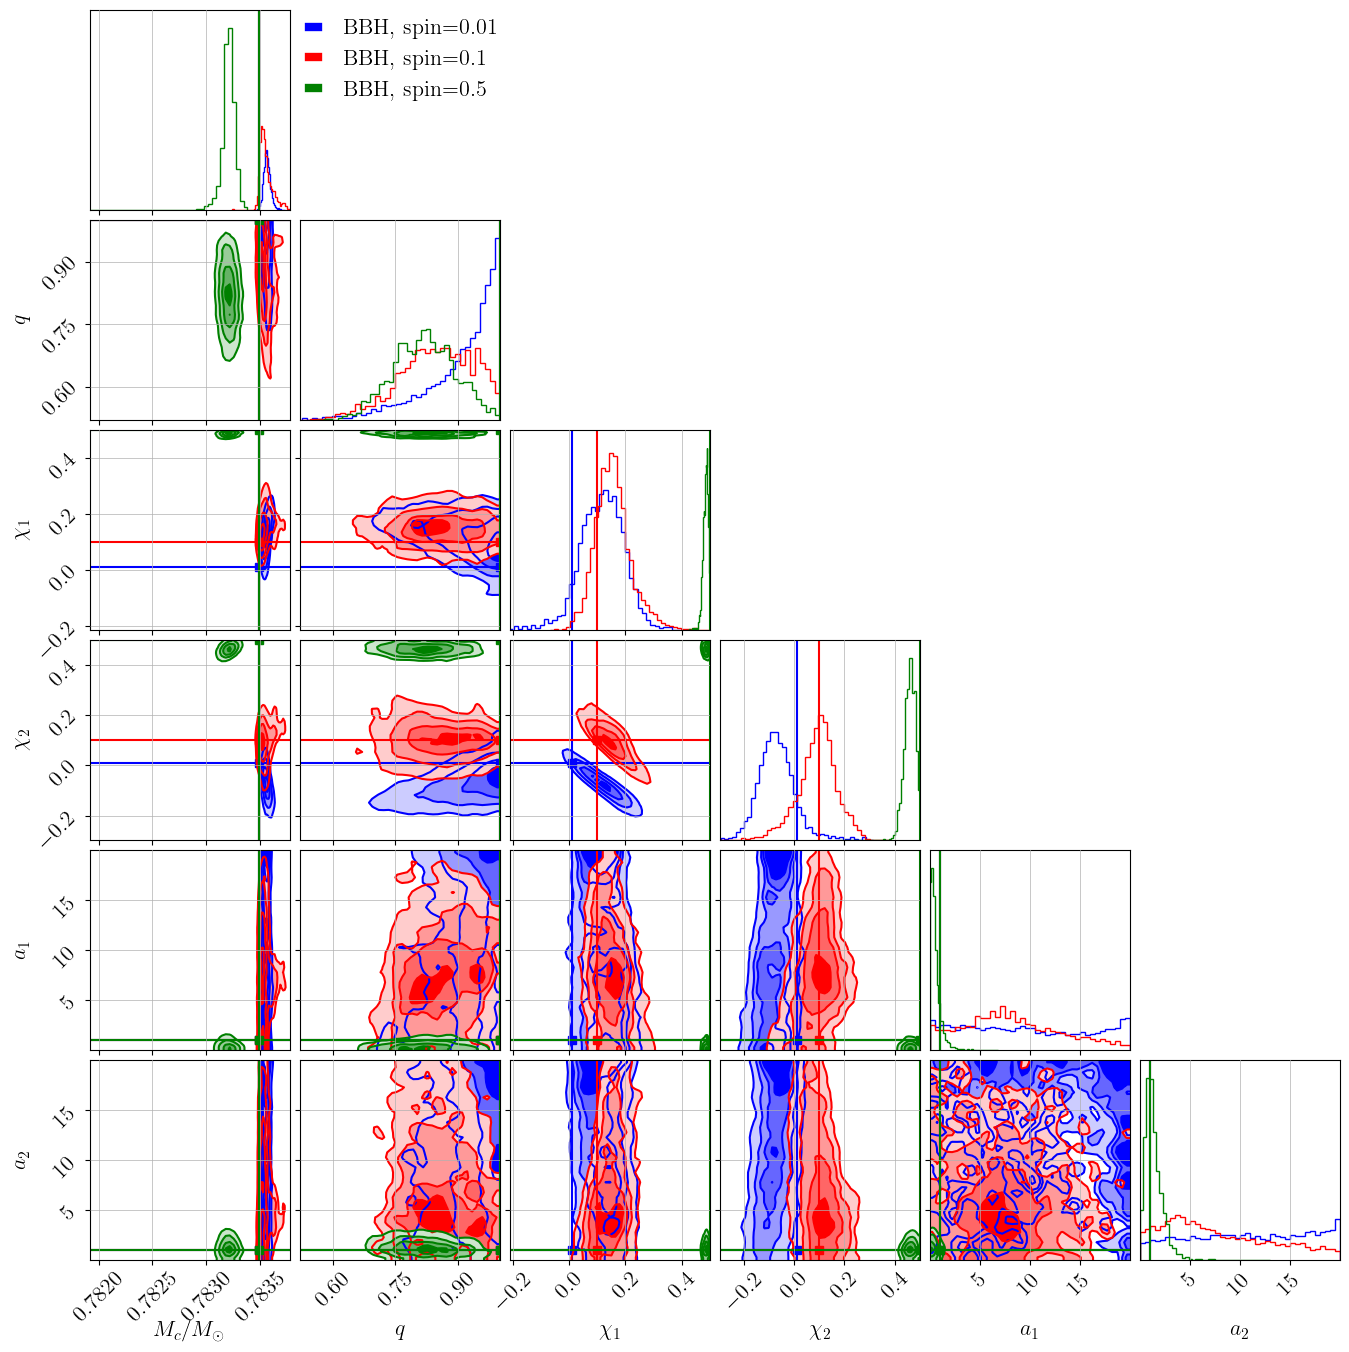

In [204]:
folder = "SSM_test-no_tidal(m1=m2=0.9)/Spin=0.01/"
fig, h1 = plot_corner_multiple(folder, mass_spin_a_keys, color="blue", label="BBH, spin=0.01")

folder = "SSM_test-no_tidal(m1=m2=0.9)/Spin=0.1/"
fig, h2 = plot_corner_multiple(folder, mass_spin_a_keys, fig=fig, color="red", label="BBH, spin=0.1")

folder = "SSM_test-no_tidal(m1=m2=0.9)/Spin=0.5/"
fig, h3 = plot_corner_multiple(folder, mass_spin_a_keys, fig=fig, color="green", label="BBH, spin=0.5")

handles = [h for h in (h1, h2, h3) if h is not None]
fig.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)

# Spin and tidal, BNS, $m_1=m_2=0.9 M_\odot$

## Universal QM

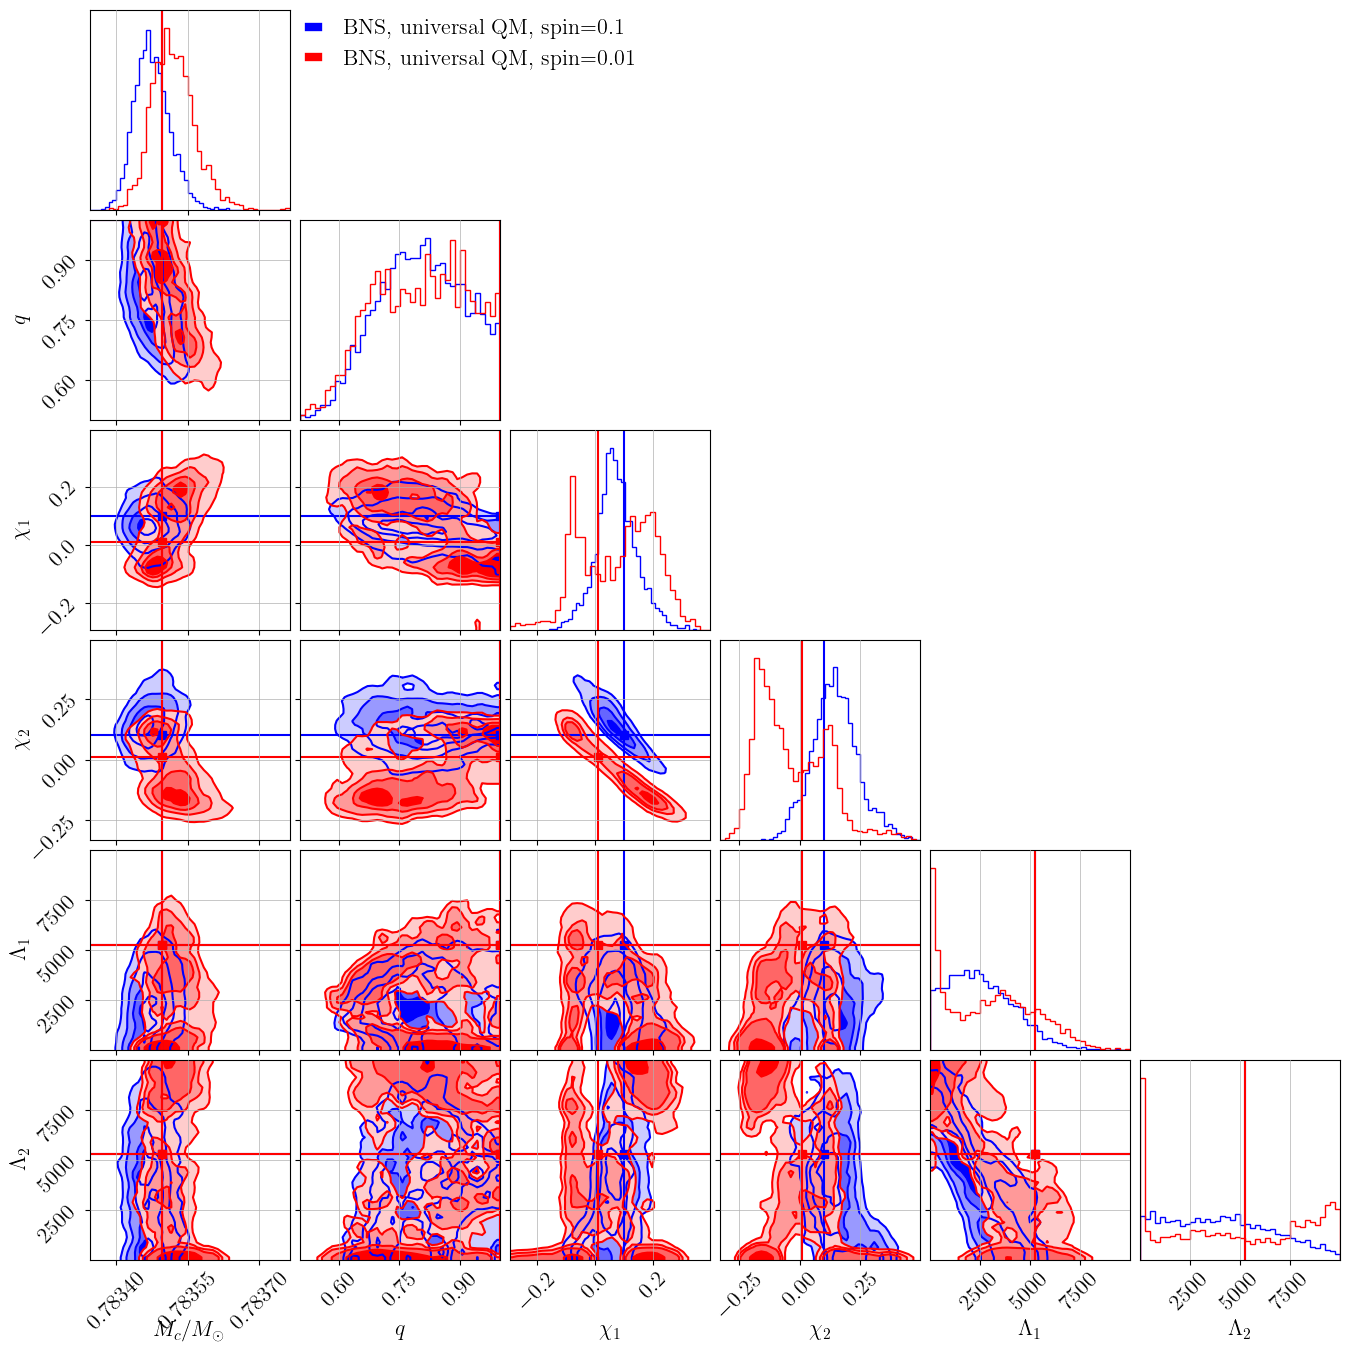

In [ ]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.1-universalQM/"
fig_universal, h1 = plot_corner_multiple(folder, mass_lambda_spin_keys, color="blue", label="BNS, universal QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.01-universalQM/"
fig_universal, h2 = plot_corner_multiple(folder, mass_lambda_spin_keys,fig = fig_universal, color="red", label="BNS, universal QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig_universal.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0), 
    borderaxespad=0.0,
    frameon=False
)

## Free QM

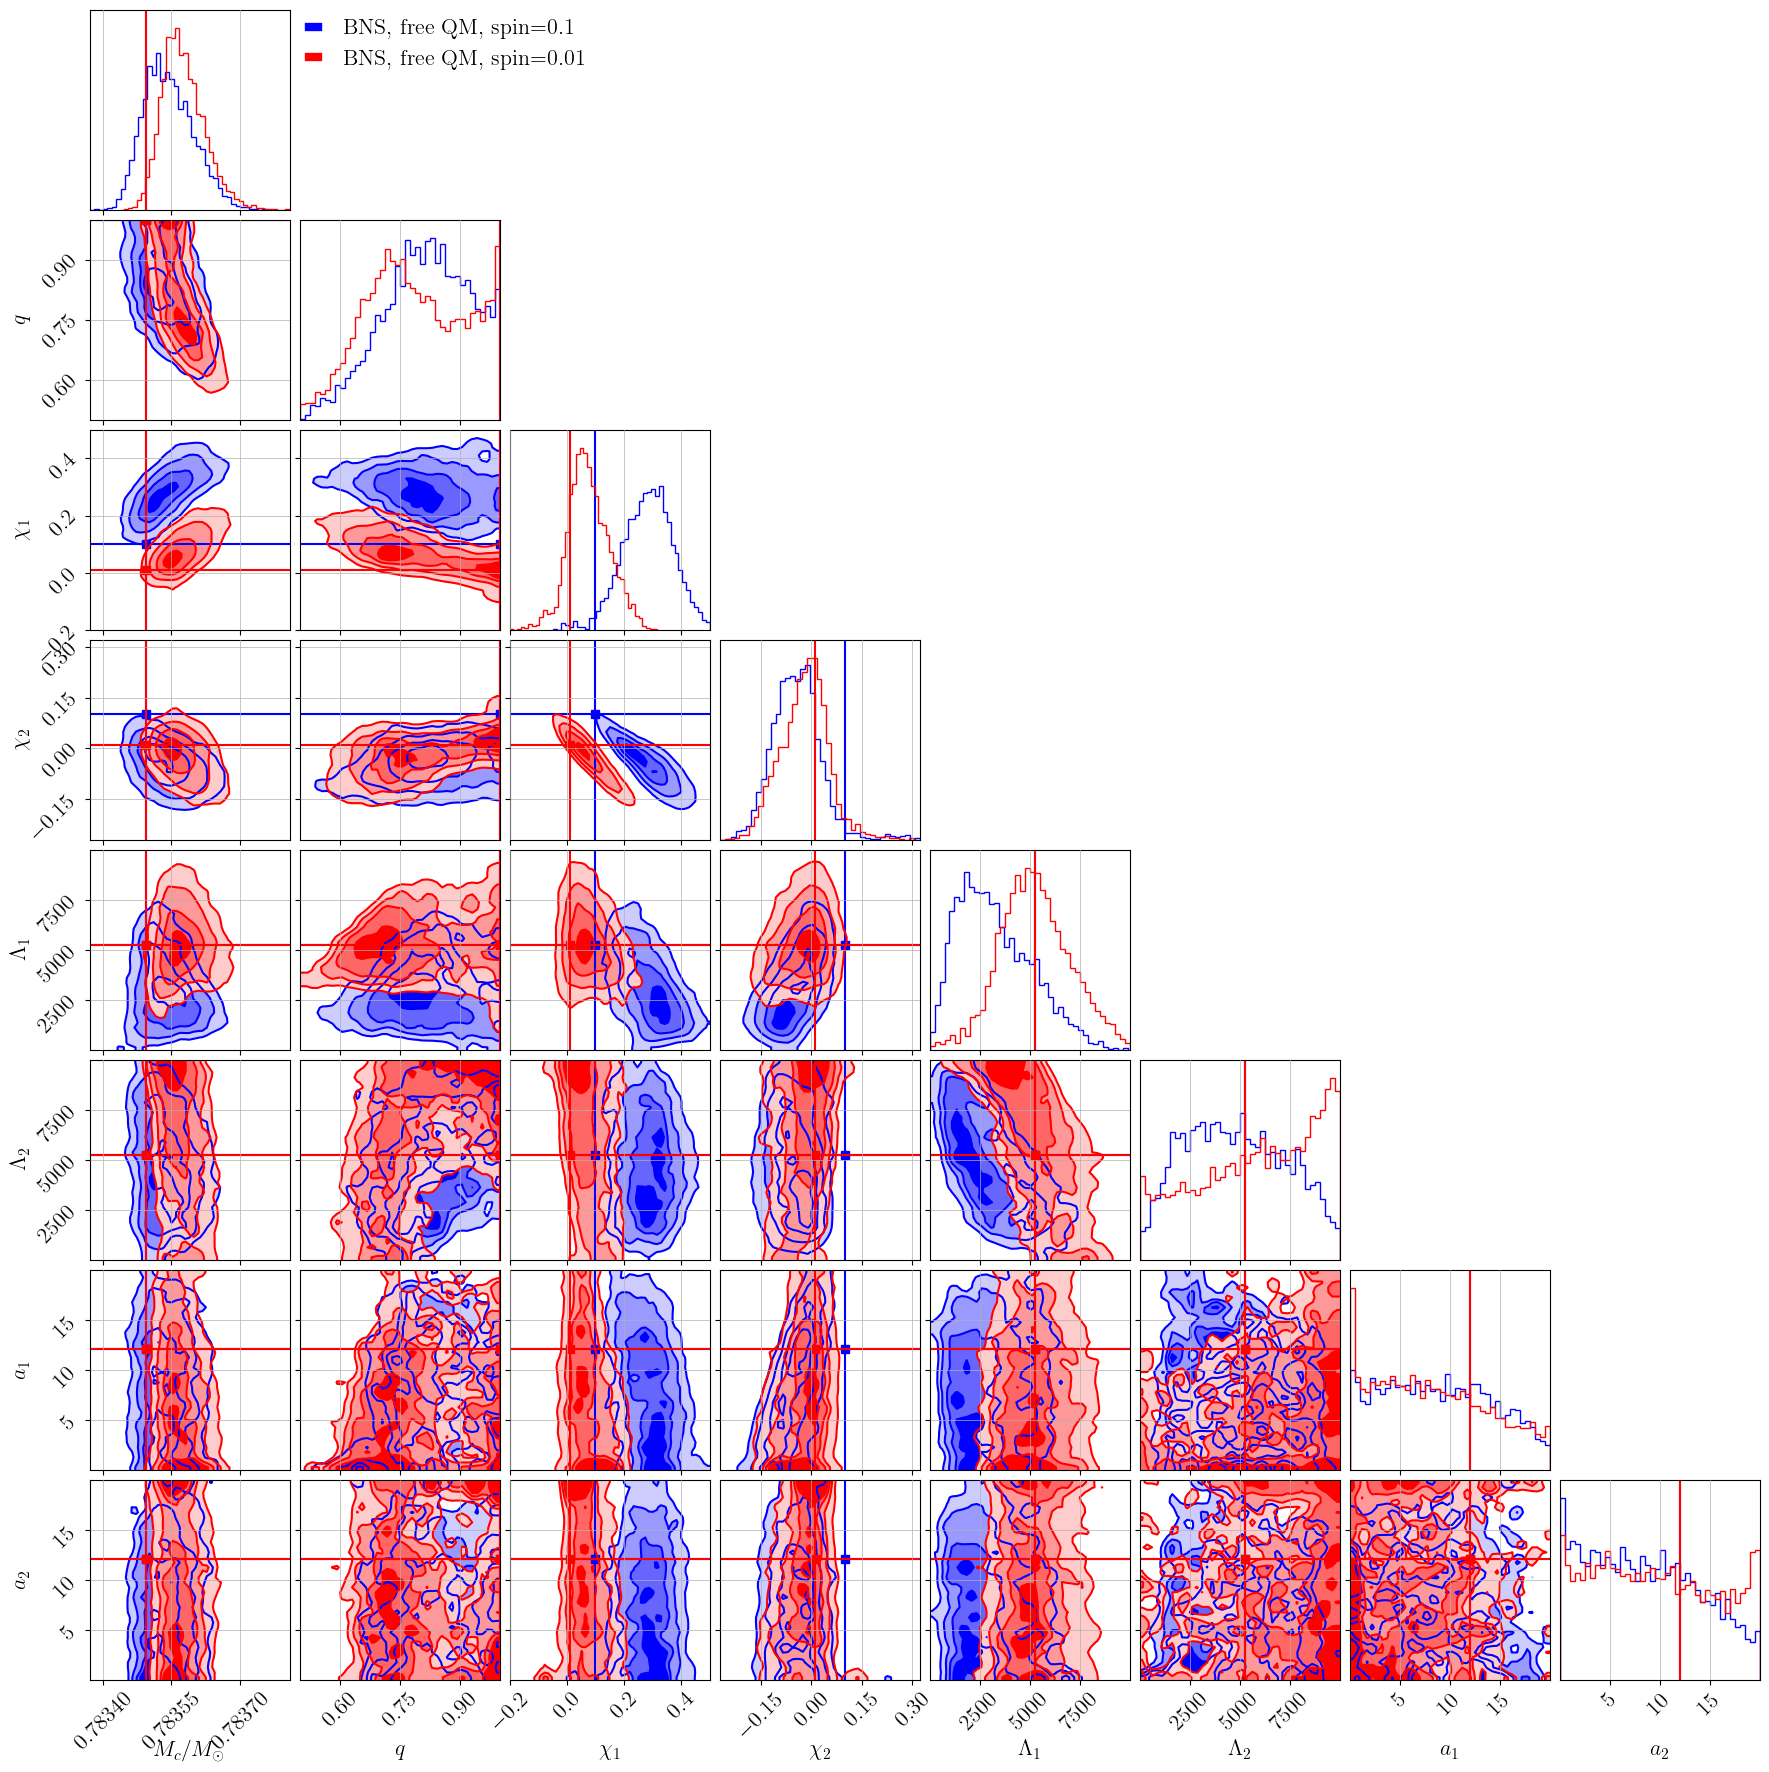

In [211]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.1-freeQM/"
fig_universal, h1 = plot_corner_multiple(folder, mass_lambda_spin_a_keys, color="blue", label="BNS, free QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.01-freeQM/"
fig_universal, h2 = plot_corner_multiple(folder, mass_lambda_spin_a_keys,fig = fig_universal, color="red", label="BNS, free QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig_universal.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)

## No QM

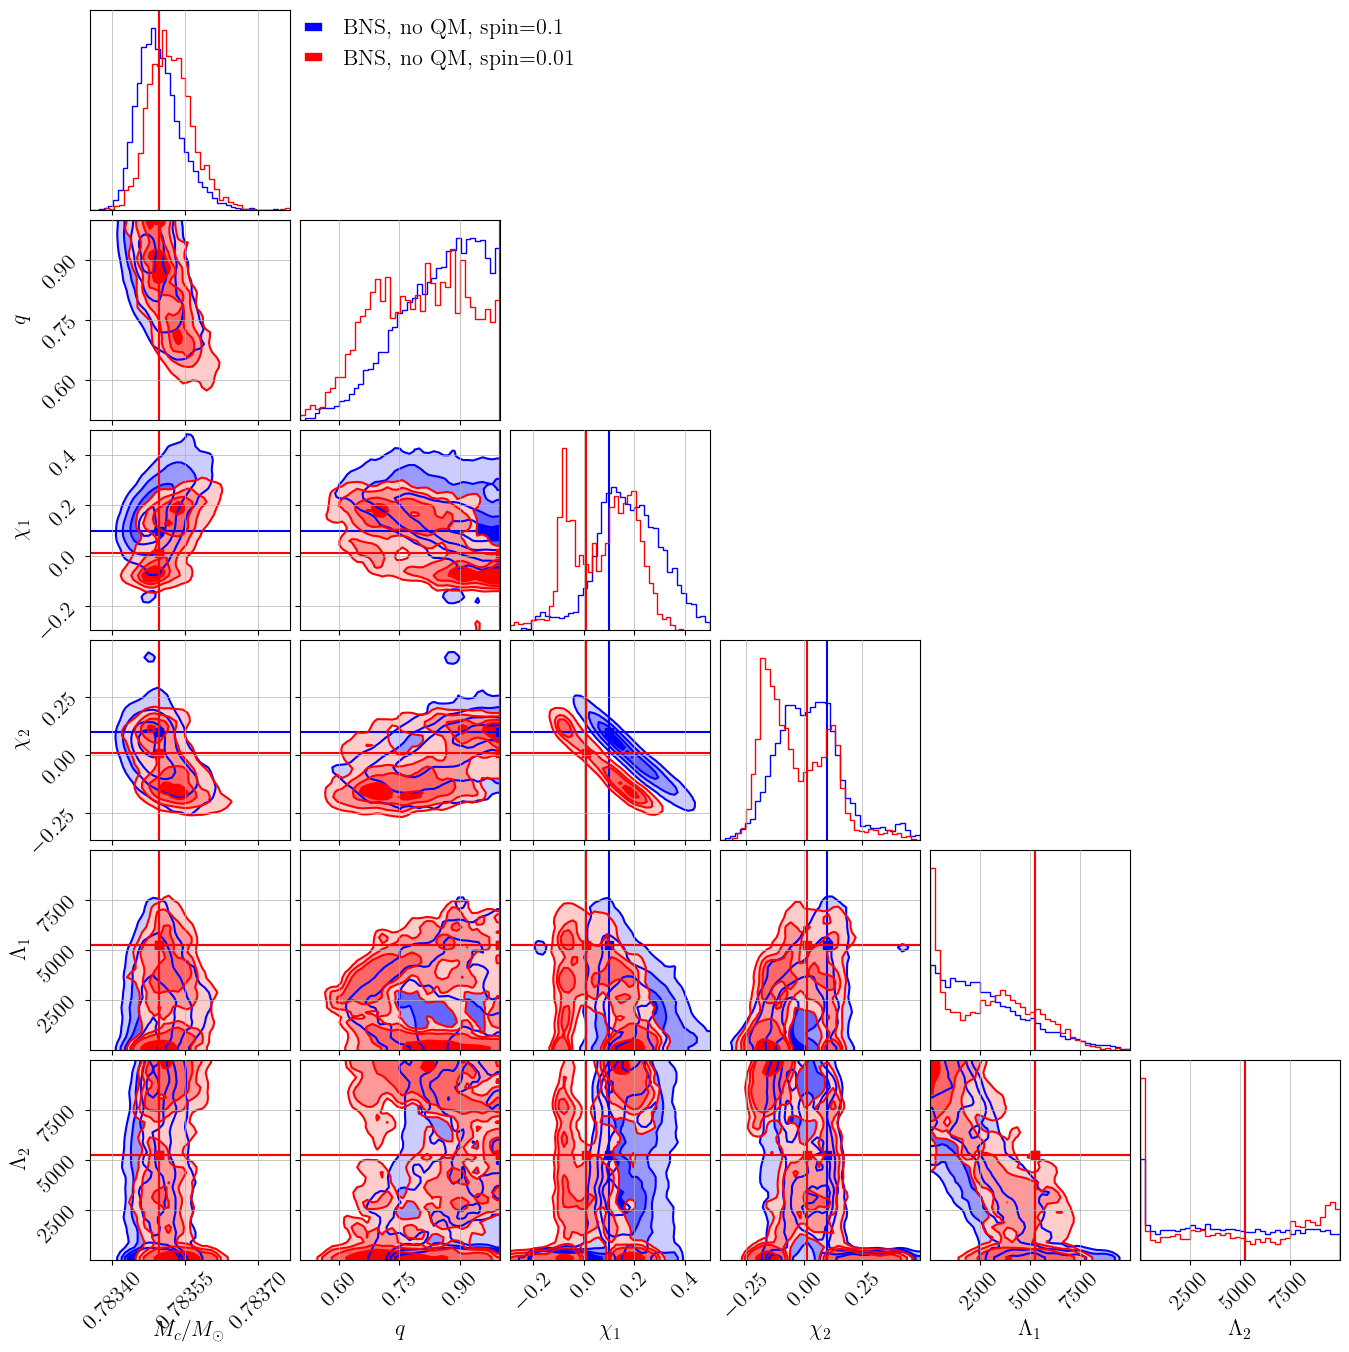

In [207]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.1-noQM/"
fig, h1 = plot_corner_multiple(folder, mass_lambda_spin_keys, color="blue", label="BNS, no QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/BNS-spin=0.01-universalQM/"
fig, h2 = plot_corner_multiple(folder, mass_lambda_spin_keys,fig = fig, color="red", label="BNS, no QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False)

# Spin and tidal, NSBH, $m_1=m_2=0.9 M_\odot$

## Universal QM

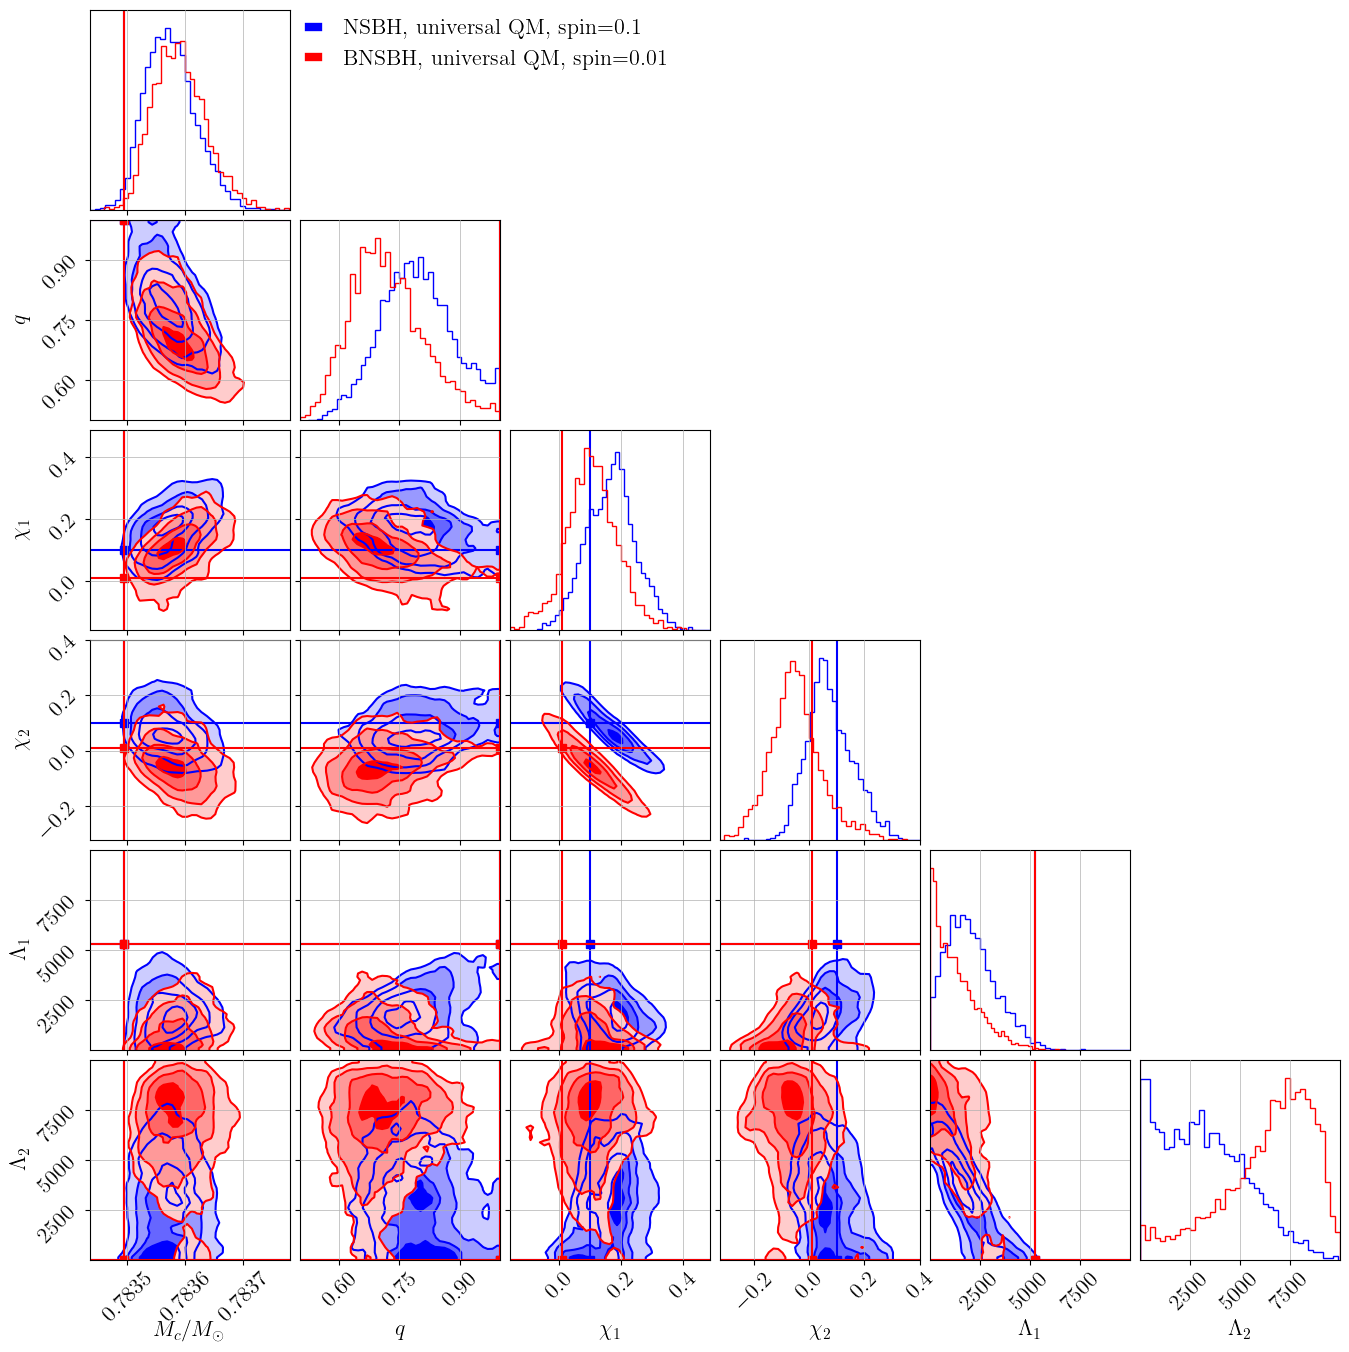

In [208]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.1-universalQM/"
fig_universal, h1 = plot_corner_multiple(folder, mass_lambda_spin_keys, color="blue", label="NSBH, universal QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.01-universalQM/"
fig_universal, h2 = plot_corner_multiple(folder, mass_lambda_spin_keys,fig = fig_universal, color="red", label="BNSBH, universal QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig_universal.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)

## Free QM

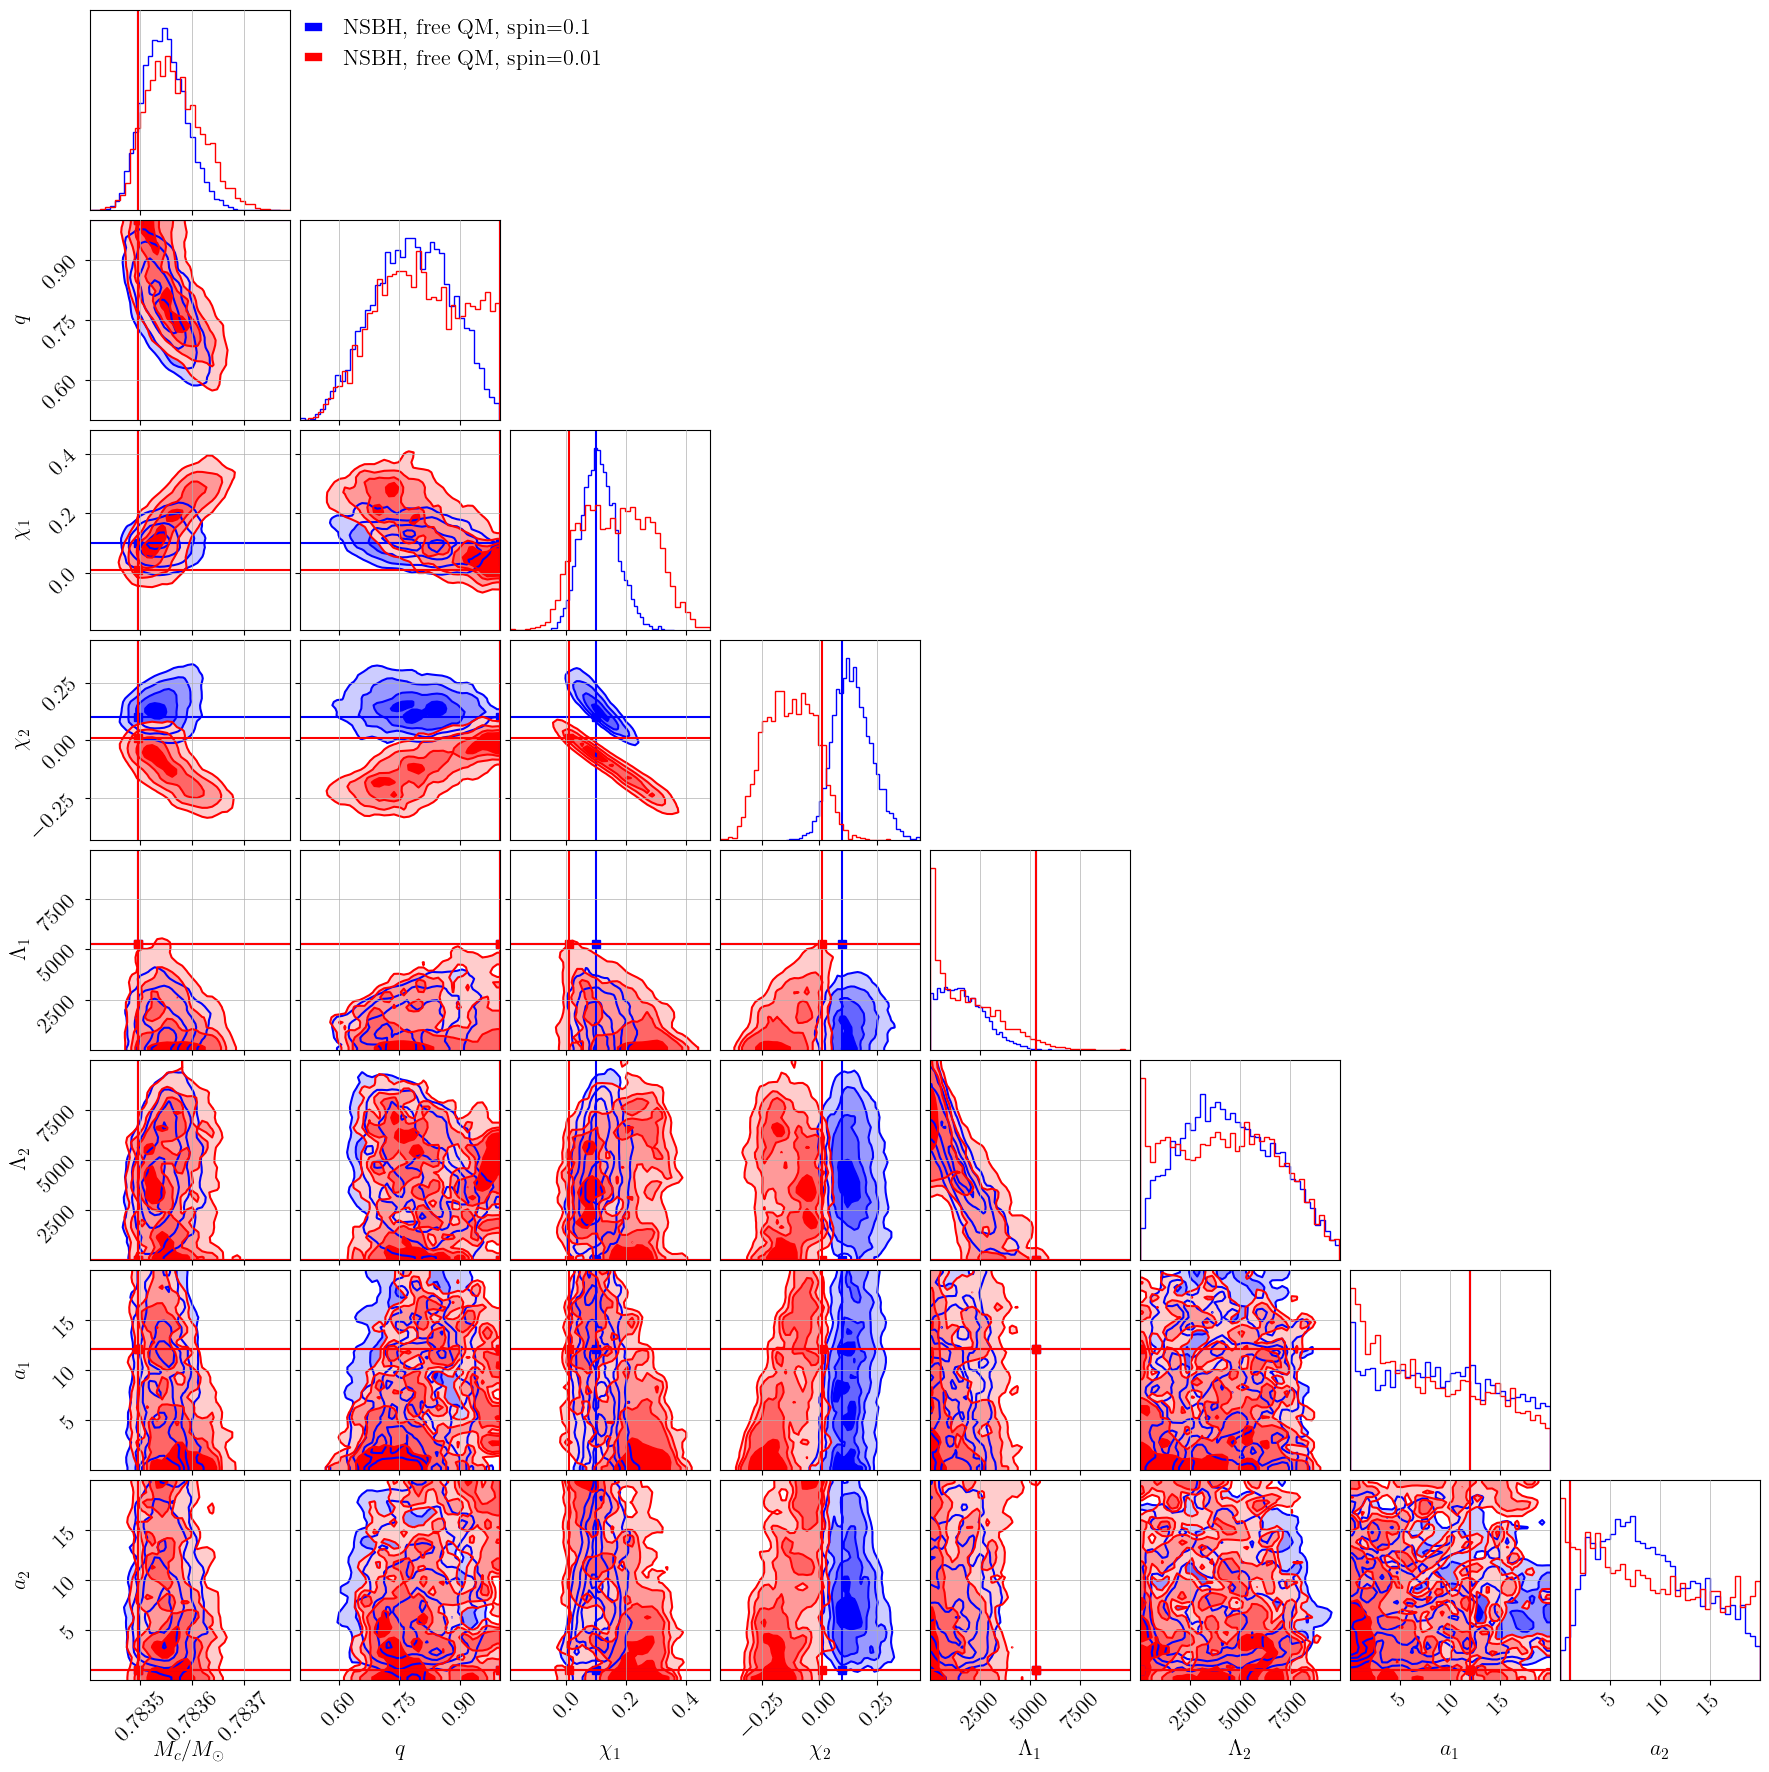

In [209]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.1-freeQM/"
fig_universal, h1 = plot_corner_multiple(folder, mass_lambda_spin_a_keys, color="blue", label="NSBH, free QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.01-freeQM/"
fig_universal, h2 = plot_corner_multiple(folder, mass_lambda_spin_a_keys,fig = fig_universal, color="red", label="NSBH, free QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig_universal.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)

## No QM

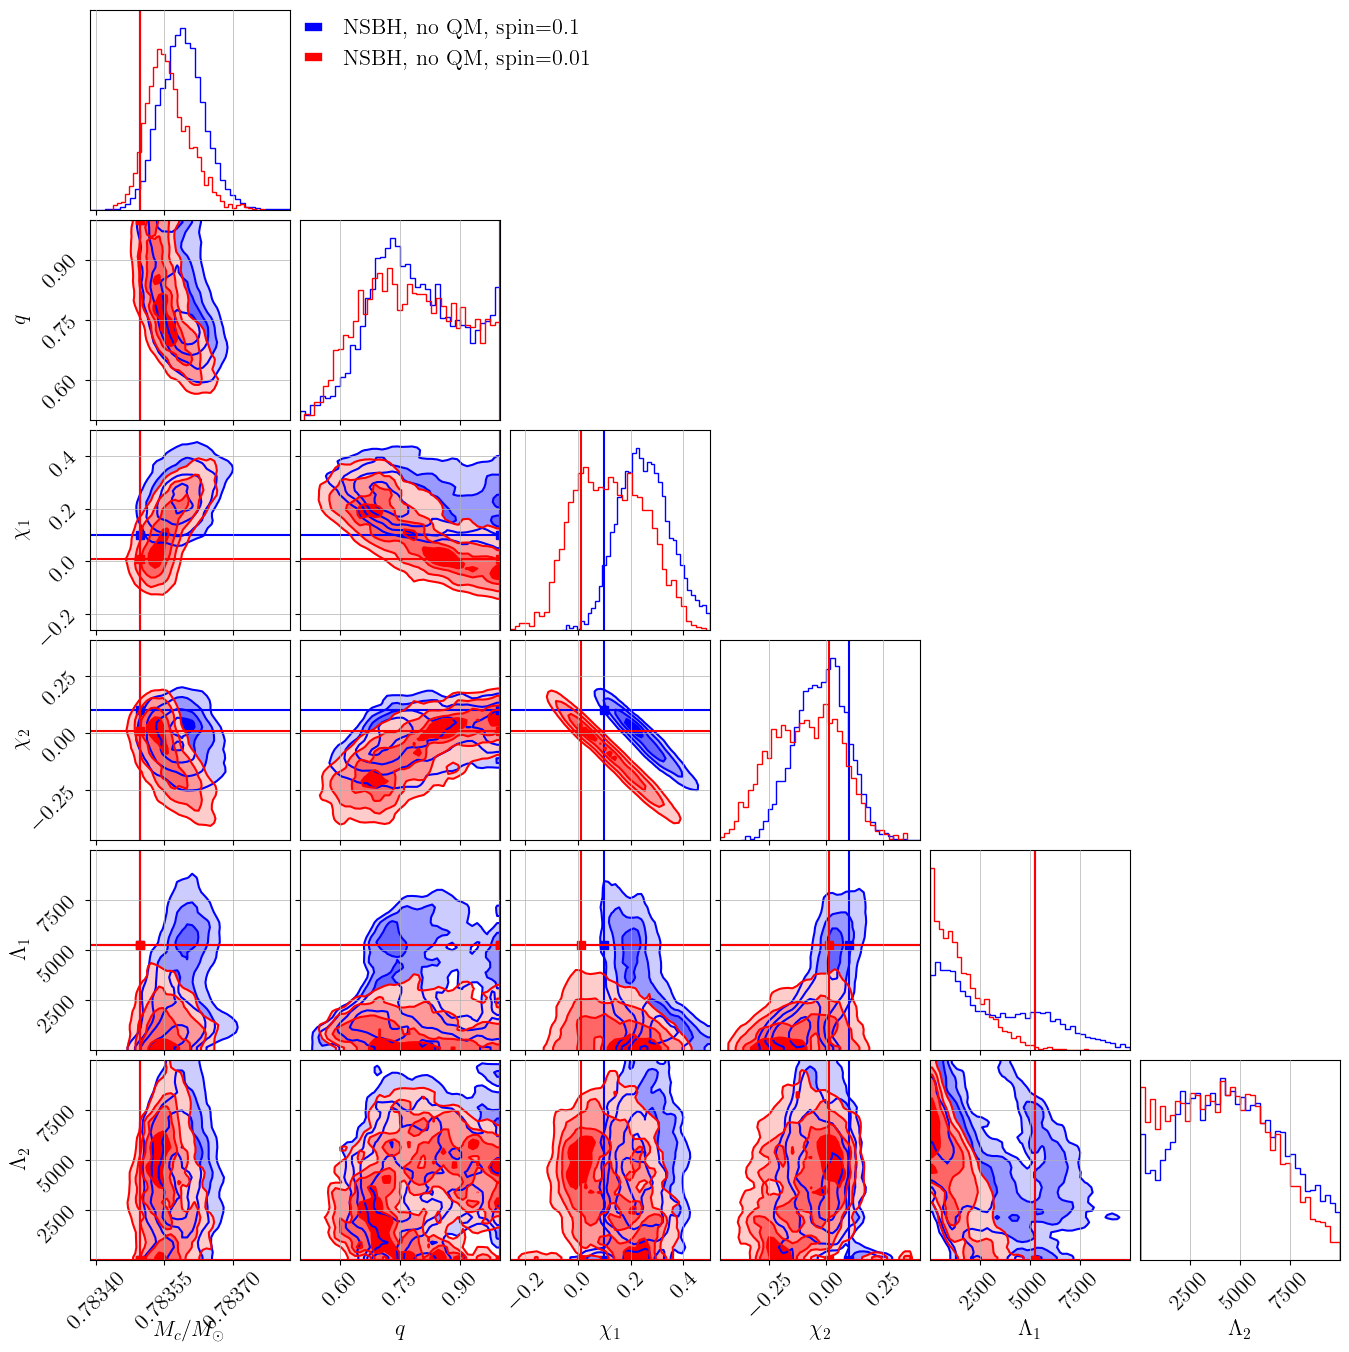

In [210]:
folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.1-noQM/"
fig_universal, h1 = plot_corner_multiple(folder, mass_lambda_spin_keys, color="blue", label="NSBH, no QM, spin=0.1")

folder = "SSM_test-spin&tidal(m1=m2=0.9)/NSBH-spin=0.01-noQM/"
fig_universal, h2 = plot_corner_multiple(folder, mass_lambda_spin_keys,fig = fig_universal, color="red", label="NSBH, no QM, spin=0.01")

handles = [h for h in (h1, h2) if h is not None]
fig_universal.axes[0].legend(
    handles=handles,
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),  # just to the right of the panel
    borderaxespad=0.0,
    frameon=False
)